In [1]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
# from polyfit import load_example, PolynomRegressor, Constraints
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
# from fastdtw import fastdtw
from scipy.spatial.distance import euclidean


# set style
#sns.set_style("white")

In [373]:
# set working directory
os.chdir("/Users/antoine/Harvard/MegasonLab/presentations/20231205_ASCB_RikkiGarner")

with open(f"20231129_cellsorting_distr0.25/data1_contact_areas.json", 'r') as f1:
    contact1_data1 = json.load(f1)
with open(f"20231129_cellsorting_distr0.25/data2_contact_areas.json", 'r') as f1:
    contact1_data2 = json.load(f1)
with open(f"20231129_cellsorting_distr0.25/data3_contact_areas.json", 'r') as f1:
    contact1_data3 = json.load(f1)
with open(f"20231129_cellsorting_distr0.25/data4_contact_areas.json", 'r') as f1:
    contact1_data4 = json.load(f1)
with open(f"20231129_cellsorting_distr0.25/data7_contact_areas.json", 'r') as f1:
    contact1_data7 = json.load(f1)
    
with open(f"20231129_cellsorting_distr0.5/data1_contact_areas.json", 'r') as f1:
    contact2_data1 = json.load(f1)
with open(f"20231129_cellsorting_distr0.5/data2_contact_areas.json", 'r') as f1:
    contact2_data2 = json.load(f1)
with open(f"20231129_cellsorting_distr0.5/data3_contact_areas.json", 'r') as f1:
    contact2_data3 = json.load(f1)
with open(f"20231129_cellsorting_distr0.5/data4_contact_areas.json", 'r') as f1:
    contact2_data4 = json.load(f1)
with open(f"20231129_cellsorting_distr0.5/data6_contact_areas.json", 'r') as f1:
    contact2_data6 = json.load(f1)

with open(f"20231129_cellsorting_distr0.75/data1_contact_areas.json", 'r') as f1:
    contact3_data1 = json.load(f1)
with open(f"20231129_cellsorting_distr0.75/data2_contact_areas.json", 'r') as f1:
    contact3_data2 = json.load(f1)
with open(f"20231129_cellsorting_distr0.75/data3_contact_areas.json", 'r') as f1:
    contact3_data3 = json.load(f1)
with open(f"20231129_cellsorting_distr0.75/data4_contact_areas.json", 'r') as f1:
    contact3_data4 = json.load(f1)
with open(f"20231129_cellsorting_distr0.75/data6_contact_areas.json", 'r') as f1:
    contact3_data6 = json.load(f1)

with open(f"20231129_cellsorting_distr1/data1_contact_areas.json", 'r') as f1:
    contact4_data1 = json.load(f1)  
with open(f"20231129_cellsorting_distr1/data2_contact_areas.json", 'r') as f1:
    contact4_data2 = json.load(f1)  
with open(f"20231129_cellsorting_distr1/data3_contact_areas.json", 'r') as f1:
    contact4_data3 = json.load(f1)  
with open(f"20231129_cellsorting_distr1/data4_contact_areas.json", 'r') as f1:
    contact4_data4 = json.load(f1)  
with open(f"20231129_cellsorting_distr1/data7_contact_areas.json", 'r') as f1:
    contact4_data7 = json.load(f1)  

cells_dict = {
    "cellsA": [
        "cell_A1",
        "cell_A4",
        "cell_A5",
        "cell_A8",
        "cell_A9",
        "cell_A12",
        "cell_A14",
        "cell_A15",
        "cell_A18"
    ],
    "cellsB": [
        "cell_A2",
        "cell_A3",
        "cell_A6",
        "cell_A7",
        "cell_A10",
        "cell_A11",
        "cell_A13",
        "cell_A16",
        "cell_A17"
    ]
}

In [374]:
import numpy as np

def fuse_datasets(datasets):
    contacts = {}
    for key in datasets[0].keys():
        values = [data[key] for data in datasets if key in data]
        if values:
            fused_values = np.mean(values, axis=0)
            contacts[key] = fused_values.tolist()
    
    return contacts

# List of datasets to be fused
datasets1 = [contact1_data1, contact1_data2, contact1_data3, contact1_data4, contact1_data7]
# datasets1 = [contact1_data3]
contacts1 = fuse_datasets(datasets1)

'''datasets2 = [contact2_data1, contact2_data2, contact2_data3, contact2_data4, contact2_data6]
# datasets2 = [contact2_data3]
contacts2 = fuse_datasets(datasets2)'''

datasets3 = [contact3_data1, contact3_data2, contact3_data3, contact3_data4, contact3_data6, contact2_data1, contact2_data2, contact2_data3, contact2_data4, contact2_data6]
# datasets3 = [contact2_data3]
contacts3 = fuse_datasets(datasets3)

datasets4 = [contact4_data1, contact4_data2, contact4_data3, contact4_data4, contact4_data7]
# datasets4 = [contact4_data3]
contacts4 = fuse_datasets(datasets4)

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


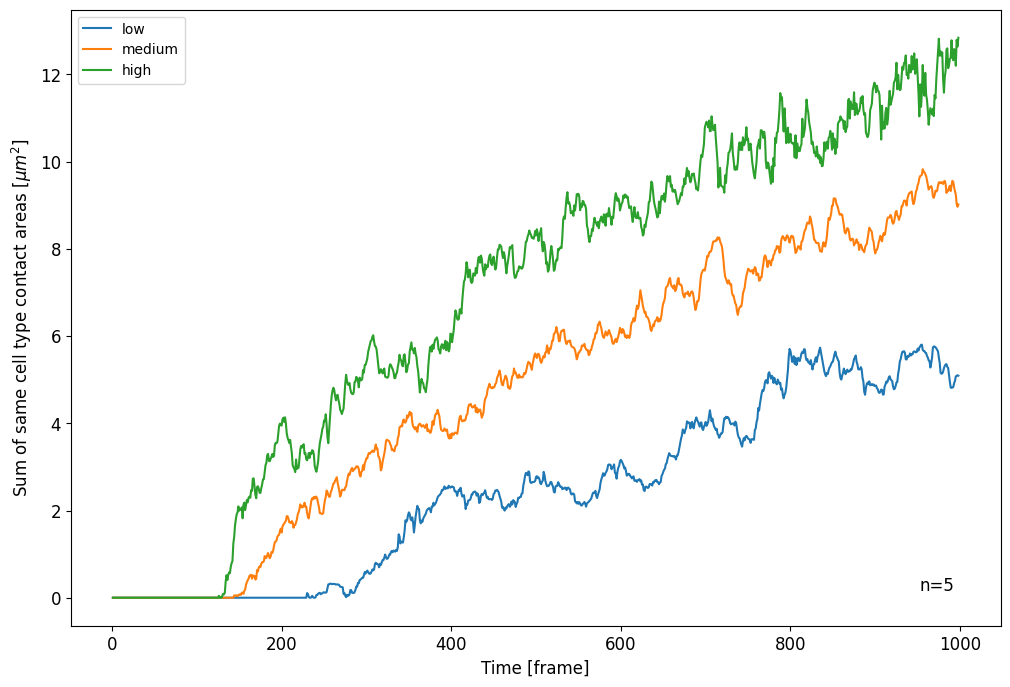

In [375]:
font_props = {'family': 'Myriad Pro', 'size': 12}
font_props_text = {'family': 'Myriad Pro', 'size': 11}
title_font = FontProperties(family='Myriad Pro', size=12)

contacts = [contacts1, contacts3, contacts4]
labels = ['0.25', '0.5', '0.75', '1']
labels = ['low [-0.25; 0.25]', 'med-low [-0.5; 0.5]', 'med-high [-0.75; 0.75]', 'high [-1; 1]']
labels = ['low', 'medium', 'high']

plt.figure(figsize=(12, 8))

for idx, file in enumerate(contacts):
    # Grouping mean values for cellsA and cellsB for each contact file
    mean_values_dict = {"cellsA": [], "cellsB": []}
    
    filtered_contacts = {key: values for key, values in file.items() if any(value != 0 for value in values)}

    # Calculate the mean values across non-zero lists at each position for cellsA and cellsB separately
    for key, values in filtered_contacts.items():
        cell_pair = key.split('-')
        if cell_pair[0] in cells_dict["cellsA"] and cell_pair[1] in cells_dict["cellsA"]:
            mean_values_dict["cellsA"].append(values)
        elif cell_pair[0] in cells_dict["cellsB"] and cell_pair[1] in cells_dict["cellsB"]:
            mean_values_dict["cellsB"].append(values)

    # Calculate the sum of mean_values_dict for cellsA and cellsB for each contact file
    sum_values_cellsA = [sum(mean_val) for mean_val in zip(*mean_values_dict["cellsA"])]
    sum_values_cellsB = [sum(mean_val) for mean_val in zip(*mean_values_dict["cellsB"])]

    # Calculate the sum between sum_values_cellsA and sum_values_cellsB
    sum_values_cells = [(a + b) for a, b in zip(sum_values_cellsA, sum_values_cellsB)]

    # Plotting mean values for cells for each contact file
    plt.plot(range(1, len(sum_values_cells) + 1), sum_values_cells, label=f'{labels[idx]}')

# Labels and legend
plt.ylabel(r'Sum of same cell type contact areas [${\mu m}^2$]', fontproperties=font_props)
plt.xlabel(r'Time [frame]', fontproperties=font_props)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.text(0.95, 0.05, r'n=5', ha='right', va='bottom', transform=plt.gca().transAxes, fontproperties=font_props)
plt.legend()

# Save the plot
plt.savefig("mean_contact_ratios.png", transparent=False, dpi=500)

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


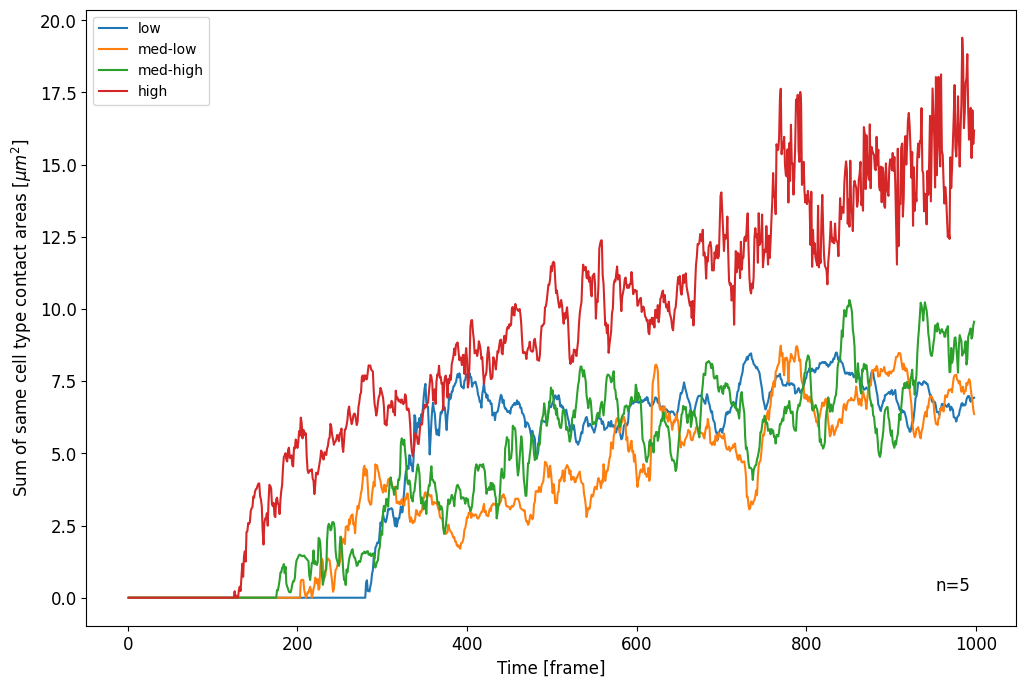

In [366]:
import numpy as np

def fuse_datasets(datasets):
    contacts = {}
    for key in datasets[0].keys():
        values = [data[key] for data in datasets if key in data]
        if values:
            fused_values = np.mean(values, axis=0)
            contacts[key] = fused_values.tolist()
    
    return contacts

# List of datasets to be fused
datasets1 = [contact1_data7]
contacts1 = fuse_datasets(datasets1)

datasets2 = [contact2_data6]
contacts2 = fuse_datasets(datasets2)

datasets3 = [contact3_data6]
contacts3 = fuse_datasets(datasets3)

datasets4 = [contact4_data7]
contacts4 = fuse_datasets(datasets4)



font_props = {'family': 'Myriad Pro', 'size': 12}
font_props_text = {'family': 'Myriad Pro', 'size': 11}
title_font = FontProperties(family='Myriad Pro', size=12)

contacts = [contacts1, contacts2, contacts3, contacts4]
labels = ['0.25', '0.5', '0.75', '1']
labels = ['low [-0.25; 0.25]', 'med-low [-0.5; 0.5]', 'med-high [-0.75; 0.75]', 'high [-1; 1]']
labels = ['low', 'med-low', 'med-high', 'high']

plt.figure(figsize=(12, 8))

for idx, file in enumerate(contacts):
    # Grouping mean values for cellsA and cellsB for each contact file
    mean_values_dict = {"cellsA": [], "cellsB": []}
    
    filtered_contacts = {key: values for key, values in file.items() if any(value != 0 for value in values)}

    # Calculate the mean values across non-zero lists at each position for cellsA and cellsB separately
    for key, values in filtered_contacts.items():
        cell_pair = key.split('-')
        if cell_pair[0] in cells_dict["cellsA"] and cell_pair[1] in cells_dict["cellsA"]:
            mean_values_dict["cellsA"].append(values)
        elif cell_pair[0] in cells_dict["cellsB"] and cell_pair[1] in cells_dict["cellsB"]:
            mean_values_dict["cellsB"].append(values)

    # Calculate the sum of mean_values_dict for cellsA and cellsB for each contact file
    sum_values_cellsA = [sum(mean_val) for mean_val in zip(*mean_values_dict["cellsA"])]
    sum_values_cellsB = [sum(mean_val) for mean_val in zip(*mean_values_dict["cellsB"])]

    # Calculate the sum between sum_values_cellsA and sum_values_cellsB
    sum_values_cells = [(a + b) for a, b in zip(sum_values_cellsA, sum_values_cellsB)]

    # Plotting mean values for cells for each contact file
    plt.plot(range(1, len(sum_values_cells) + 1), sum_values_cells, label=f'{labels[idx]}')

# Labels and legend
plt.ylabel(r'Sum of same cell type contact areas [${\mu m}^2$]', fontproperties=font_props)
plt.xlabel(r'Time [frame]', fontproperties=font_props)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.text(0.95, 0.05, r'n=5', ha='right', va='bottom', transform=plt.gca().transAxes, fontproperties=font_props)
plt.legend()

# Save the plot
plt.savefig("mean_contact_ratios.png", transparent=False, dpi=500)

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


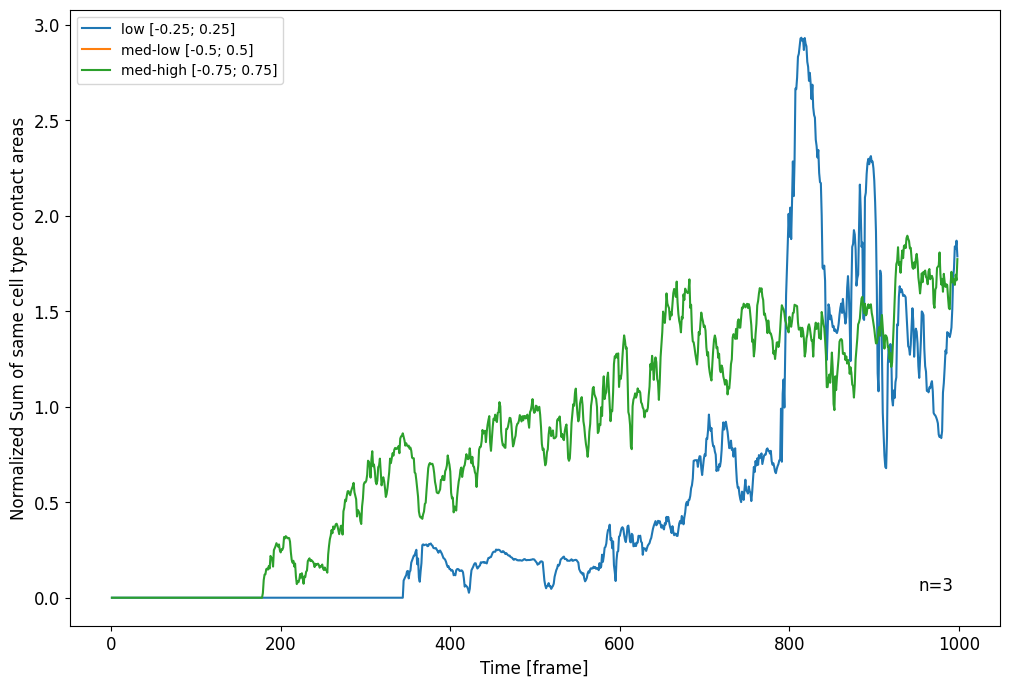

In [323]:
font_props = {'family': 'Myriad Pro', 'size': 12}
font_props_text = {'family': 'Myriad Pro', 'size': 11}
title_font = FontProperties(family='Myriad Pro', size=12)

contacts = [contacts1, contacts3, contacts4]
labels = ['0.25', '0.5', '0.75', '1']
labels = ['low [-0.25; 0.25]', 'med-low [-0.5; 0.5]', 'med-high [-0.75; 0.75]', 'high [-1; 1]']

plt.figure(figsize=(12, 8))

for idx, file in enumerate(contacts):
    # Grouping mean values for cellsA and cellsB for each contact file
    mean_values_dict = {"cellsA": [], "cellsB": []}
    
    filtered_contacts = {key: values for key, values in file.items() if any(value != 0 for value in values)}

    # Calculate the mean values across non-zero lists at each position for cellsA and cellsB separately
    for key, values in filtered_contacts.items():
        cell_pair = key.split('-')
        if cell_pair[0] in cells_dict["cellsA"] and cell_pair[1] in cells_dict["cellsA"]:
            mean_values_dict["cellsA"].append(values)
        elif cell_pair[0] in cells_dict["cellsB"] and cell_pair[1] in cells_dict["cellsB"]:
            mean_values_dict["cellsB"].append(values)

    # Calculate the mean of mean_values_dict for cellsA and cellsB for each contact file
    mean_values_cellsA = [sum(mean_val) / len(mean_val) for mean_val in zip(*mean_values_dict["cellsA"])]
    mean_values_cellsB = [sum(mean_val) / len(mean_val) for mean_val in zip(*mean_values_dict["cellsB"])]

    # Calculate the mean between mean_values_cellsA and mean_values_cellsB
    mean_values_cells = [(a + b) for a, b in zip(mean_values_cellsA, mean_values_cellsB)]

    # Convert mean_values_cells to a numpy array for calculations
    mean_values_cells = np.array(mean_values_cells)

    # Plotting normalized mean values for cells for each contact file
    plt.plot(range(1, len(mean_values_cells) + 1), mean_values_cells, label=f'{labels[idx]}')

# Labels and legend
plt.ylabel(r'Normalized Sum of same cell type contact areas', fontproperties=font_props)
plt.xlabel(r'Time [frame]', fontproperties=font_props)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.text(0.95, 0.05, r'n=3', ha='right', va='bottom', transform=plt.gca().transAxes, fontproperties=font_props)
plt.legend()

# Save the plot
plt.savefig("normalized_mean_contact_areas.png", transparent=False, dpi=500)


findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


153
153
153
153


findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


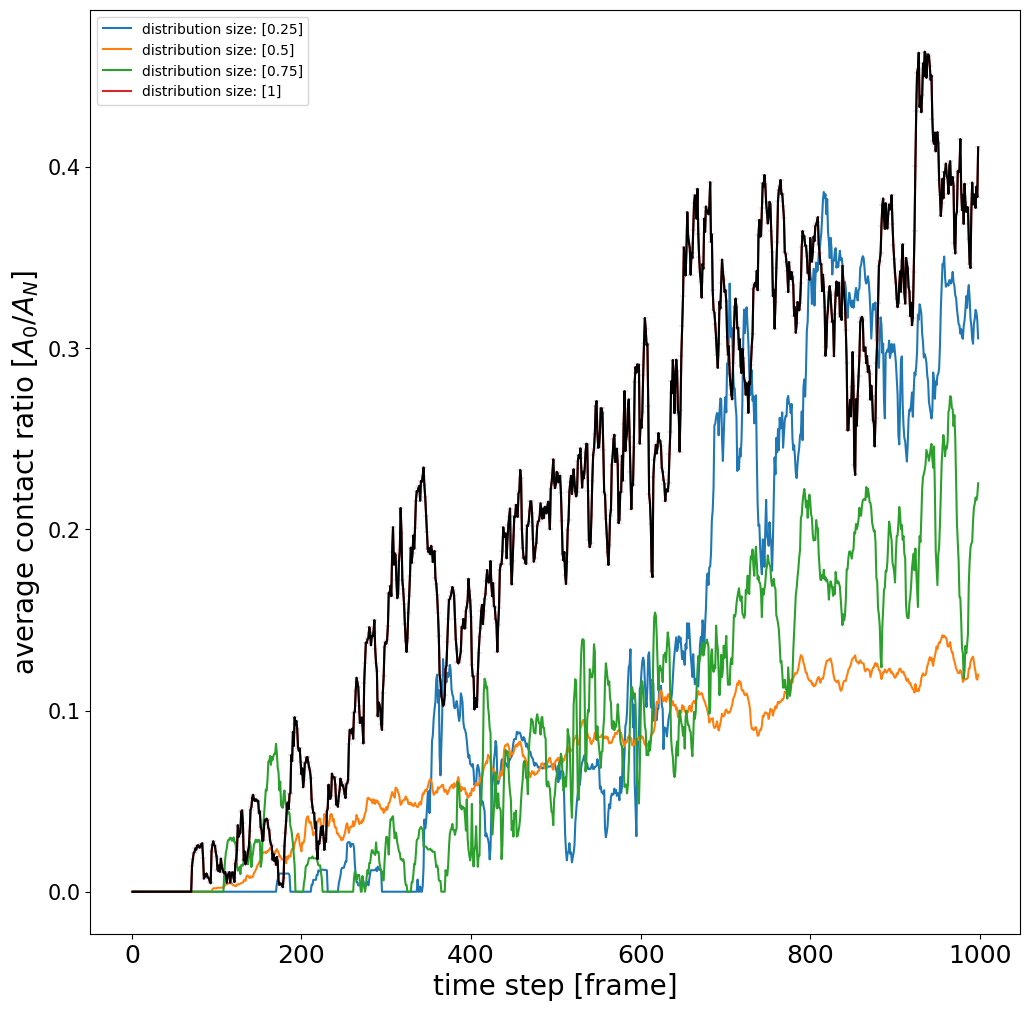

In [289]:
font_props = {'family': 'Myriad Pro', 'size': 20}
font_props_text = {'family': 'Myriad Pro', 'size': 11}
title_font = FontProperties(family='Myriad Pro',  size=20)

contacts = [contacts1, contacts2, contacts3, contacts4]
labels = ['0.25', '0.5', '0.75', '1']

plt.figure(figsize=(12, 12))
i = 0
for file in contacts: 
    print(len(file))
    # Filter out lists with all zeroes
    filtered_contacts = {key: values for key, values in file.items() if any(value != 0 for value in values)}
    # Calculate the mean values across non-zero lists at each position
    mean_values = [sum([values[i] for values in filtered_contacts.values()]) / len(filtered_contacts) for i in range(max(len(lst) for lst in filtered_contacts.values()))]

    # Get x values as the length of the mean_values list
    x_values = range(1, len(mean_values) + 1)

    # Plot the mean values for each contact dataset separately
    plt.plot(x_values, mean_values, label=f"distribution size: [{labels[i]}]")
    i = i+1

# Calculate overall mean and standard deviation across all datasets
mean_ratios = np.array([mean_values for file in contacts])
mean_ratio = np.mean(mean_ratios, axis=0)
std_values = np.std(mean_ratios, axis=0)

# Plot the overall mean with error bars
plt.errorbar(range(1, len(mean_ratio) + 1), mean_ratio, yerr=std_values, fmt='-', 
             color='black', ecolor='#662D91', 
             capsize=2, elinewidth=0.08, capthick=0.1)

# Labels and legend
plt.ylabel(r'average contact ratio $[A_0/A_N]$', fontproperties=font_props)
plt.xlabel(r'time step [frame]', fontproperties=font_props)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)
plt.legend()

# Save the plot
plt.savefig("separate_contact_ratios.png", transparent=False, dpi=500)


153


findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.


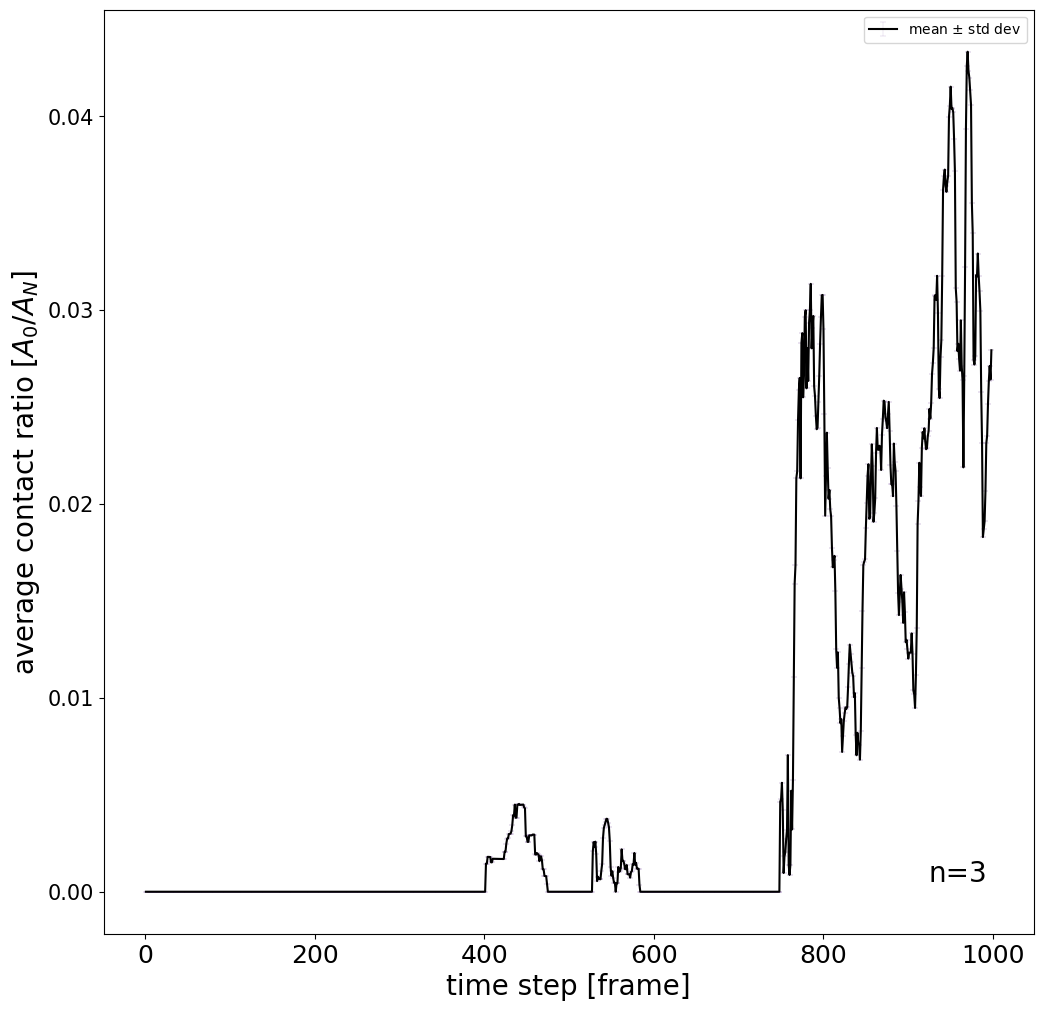

In [4]:
font_props = {'family': 'Myriad Pro', 'size': 20}
font_props_text = {'family': 'Myriad Pro', 'size': 11}
title_font = FontProperties(family='Myriad Pro',  size=20)

contacts = [contacts1, contacts2, contacts3]
mean_ratios = []

for file in contacts: 
    print(len(file))
    # Filter out lists with all zeroes
    filtered_contacts = {key: values for key, values in file.items() if any(value != 0 for value in values)}
    # Calculate the mean values across non-zero lists at each position
    mean_values = [sum([values[i] for values in filtered_contacts.values()]) / len(filtered_contacts) for i in range(max(len(lst) for lst in filtered_contacts.values()))]
    mean_ratios.append(mean_values)
    
    # Get x values as the length of the mean_valus list
    x_values = [range(1, len(mean_values) + 1)]

    # Create a plot
    plt.figure(figsize=(12, 12))

    # Plot the mean values
    #plt.plot(x_values, mean_values, label='mean contact area ratio')
    #plt.legend()


mean_ratio = np.mean(mean_ratios, axis=0)
std_values = np.std(mean_ratios, axis=0)

#plt.plot(list(range(1, len(mean_ratio) + 1)), mean_ratio, color = 'black', linewidth = 0.5)
plt.errorbar(range(1, len(mean_ratio) + 1), mean_ratio, yerr=std_values, fmt='-', 
             color = 'black', ecolor = '#662D91', 
             capsize = 2, elinewidth = 0.08, capthick = .1)


# labels and legend
plt.ylabel(r'average contact ratio $[A_0/A_N]$', fontproperties=font_props)
plt.xlabel(r'time step [frame]', fontproperties=font_props)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)
plt.legend([r'mean $\pm$ std dev'])
plt.text(0.95, 0.05, r'n=3', ha='right', va='bottom', transform=plt.gca().transAxes, fontproperties=font_props)
locs, labels = xticks()

# Save the plot
plt.savefig("aggregation_contact_ratios.png", transparent=False, dpi=500)

In [7]:
with open(f"data1_sorting_scores.json", 'r') as f1:
    scores1 = json.load(f1)
with open(f"data2_sorting_scores.json", 'r') as f1:
    scores2 = json.load(f1)
with open(f"data3_sorting_scores.json", 'r') as f1:
    scores3 = json.load(f1)

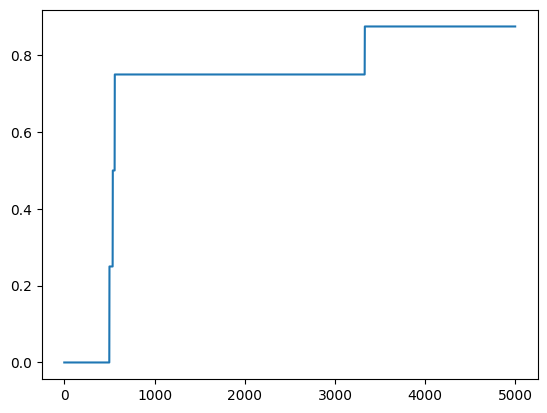

In [10]:
keys, values = [], []

for idx, (key, value) in enumerate(scores3.items()):
    keys.append(idx)
    for key2, value2 in enumerate(value.items()): 
        values.append(value2[1])

plt.plot(keys, values)

In [4]:
with open(f"data1_msd.json", 'r') as f1:
    msd1 = json.load(f1)
with open(f"data2_msd.json", 'r') as f1:
    msd2 = json.load(f1)
with open(f"data3_msd.json", 'r') as f1:
    msd3 = json.load(f1)

[[0.0, 1.0939467074422282e-06, 7.63006239878905e-06, 3.22185659626939e-05, 7.753072310379139e-05, 0.00014318068724605837, 0.00023384059011277714, 0.00032678971183486283, 0.00046175231932465977, 0.0005599450170166165, 0.0006873877823636576, 0.0007716111404079129, 0.0008112748751614163, 0.0007761623946862528, 0.0008076059766608523, 0.0008578828437748598, 0.0008547158031433355, 0.0009573759443810559, 0.001023489956423873, 0.0011391761868253525, 0.0013817824192301487, 0.001628018344490556, 0.001983223333809292, 0.0023917711041576695, 0.002878371247788891, 0.0034201782054879004, 0.0041782945900195045, 0.004957213572197361, 0.005983757982903626, 0.007281997175596189, 0.008780650903645437, 0.010603808099403977, 0.012681586726102978, 0.014815040151006542, 0.01723422610666603, 0.01996984325523954, 0.023026108363410458, 0.026355750142101897, 0.029771792343126435, 0.033851851195663585, 0.03742434256673732, 0.040924386732513085, 0.04434587018477032, 0.04739601012261119, 0.04967075533932075, 0.0516

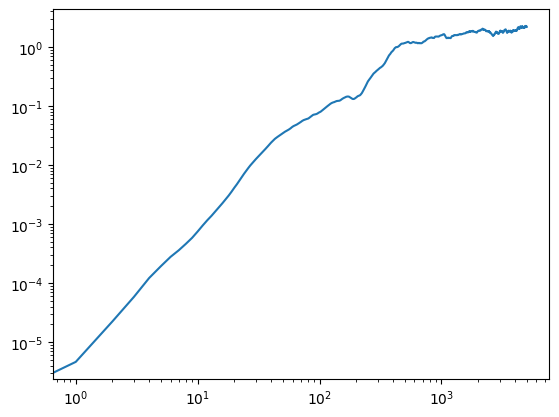

In [6]:
keys, values = [], []
for key, value in msd1.items():
    keys.append(key)
    values.append(value)

cell_values, cell_keys = [], []
for idx, value in enumerate(values): 
    if idx % 2 == 0: 
        cell_values.append(values[idx])
        cell_keys.append(keys[idx])

print(cell_values)
cell_mean_values = np.mean(cell_values, axis = 0)
print(cell_mean_values)

plt.loglog(cell_mean_values)